In [5]:
from cell_paint_seg import utils, image_io
import matplotlib.pyplot as plt
from skimage import measure, exposure, io
import numpy as np

In [8]:
out_dir = "/Users/thomasathey/Documents/shavit-lab/fraenkel/first-sample/Assay Dev 20230329/BR00142688__2024-03-29T19_57_13-Measurement 1/deployment-test-small/cropped_ims_soma"
seg_level = 1

1.0 of cell footprints fall within 128x128


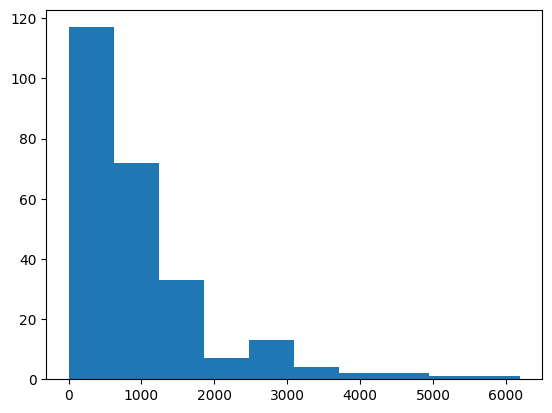

In [9]:
id_to_path_im = utils.get_id_to_path(
    "/Users/thomasathey/Documents/shavit-lab/fraenkel/first-sample/Assay Dev 20230329/BR00142688__2024-03-29T19_57_13-Measurement 1/deployment-test-small/tifs",
    tag=".tif",
)
id_to_path_seg = utils.get_id_to_path(
    "/Users/thomasathey/Documents/shavit-lab/fraenkel/first-sample/Assay Dev 20230329/BR00142688__2024-03-29T19_57_13-Measurement 1/deployment-test-small/segmentations",
    tag=".tif",
)

bbox_areas = []
counter = 0
total = 0

for id in id_to_path_seg.keys():
    paths_im = id_to_path_im[id]
    paths_seg = id_to_path_seg[id]

    ims = image_io.read_ims(paths_im)
    segs = image_io.read_ims(paths_seg)

    regprops = measure.regionprops(segs[seg_level])

    for regprop in regprops:
        bbox = regprop["bbox"]
        width = bbox[2] - bbox[0]
        height = bbox[3] - bbox[1]
        bbox_areas.append(width * height)
        if width <= 128 and height <= 128:
            counter += 1
        total += 1

plt.hist(bbox_areas)
print(f"{counter/total} of cell footprints fall within 128x128")

In [11]:
id_to_path_im = utils.get_id_to_path(
    "/Users/thomasathey/Documents/shavit-lab/fraenkel/first-sample/Assay Dev 20230329/BR00142688__2024-03-29T19_57_13-Measurement 1/deployment-test-small/tifs",
    tag=".tif",
)
id_to_path_seg = utils.get_id_to_path(
    "/Users/thomasathey/Documents/shavit-lab/fraenkel/first-sample/Assay Dev 20230329/BR00142688__2024-03-29T19_57_13-Measurement 1/deployment-test-small/segmentations",
    tag=".tif",
)

bbox_areas = []
counter = 0
total = 0

for id in id_to_path_seg.keys():
    paths_im = id_to_path_im[id]
    paths_seg = id_to_path_seg[id]

    ims = image_io.read_ims(paths_im)
    ims = [exposure.equalize_adapthist(im, clip_limit=0.03) for im in ims]
    segs = image_io.read_ims(paths_seg)

    regprops = measure.regionprops(segs[seg_level])

    for i, regprop in enumerate(regprops):
        bbox = regprop["bbox"]
        height = bbox[2] - bbox[0]
        width = bbox[3] - bbox[1]
        label = regprop["label"]

        if height <= 128 and width <= 128:
            startx, starty = (128 - height) // 2, (128 - width) // 2
            endx, endy = startx + height, starty + width

            cell_mask = segs[seg_level][bbox[0] : bbox[2], bbox[1] : bbox[3]] == label

            images = []
            for c in [2, 5, 4]:
                images.append(ims[c][bbox[0] : bbox[2], bbox[1] : bbox[3]])
            images_lasso = []
            for image in images:
                image[cell_mask == 0] = 0
                images_lasso.append(image)
            images_128 = []
            for image in images_lasso:
                blank = np.zeros((128, 128), dtype="uint8")
                blank[startx:endx, starty:endy] = (image * 255).astype("uint8")
                images_128.append(blank)

            im_rgb = np.stack(images_128, axis=2)

            io.imsave(f"{out_dir}/{id}-{label}.tiff", im_rgb)
            # f, axs = plt.subplots(ncols=2)
            # axs[0].imshow(im_rgb)
            # plt.show()

/var/folders/gy/jk_d3cx54vj18w9sm6x3sg_80000gn/T/ipykernel_62805/3728358671.py:47: UserWarning: /Users/thomasathey/Documents/shavit-lab/fraenkel/first-sample/Assay Dev 20230329/BR00142688__2024-03-29T19_57_13-Measurement 1/deployment-test-small/cropped_ims_soma/r01c01f01p01-28.tiff is a low contrast image
  io.imsave(f"{out_dir}/{id}-{label}.tiff", im_rgb)
/var/folders/gy/jk_d3cx54vj18w9sm6x3sg_80000gn/T/ipykernel_62805/3728358671.py:47: UserWarning: /Users/thomasathey/Documents/shavit-lab/fraenkel/first-sample/Assay Dev 20230329/BR00142688__2024-03-29T19_57_13-Measurement 1/deployment-test-small/cropped_ims_soma/r01c01f01p01-30.tiff is a low contrast image
  io.imsave(f"{out_dir}/{id}-{label}.tiff", im_rgb)
/var/folders/gy/jk_d3cx54vj18w9sm6x3sg_80000gn/T/ipykernel_62805/3728358671.py:47: UserWarning: /Users/thomasathey/Documents/shavit-lab/fraenkel/first-sample/Assay Dev 20230329/BR00142688__2024-03-29T19_57_13-Measurement 1/deployment-test-small/cropped_ims_soma/r01c01f01p01-35.tiff